Module 1: Dataset Setup and Image Labeling

Class distribution: {'wrinkles': 100, 'darkspots': 99, 'puffy eyes': 101, 'clear face': 97}


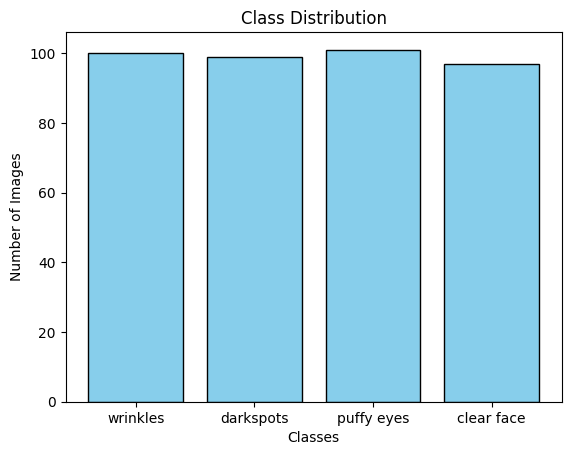

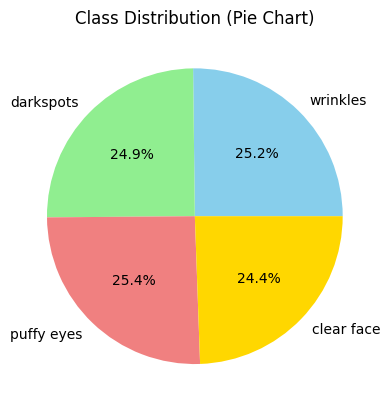

In [16]:
### Module 1: Dataset Setup and Image Labeling

import os
import matplotlib.pyplot as plt

# Dataset path and classes
dataset_path = r"C:\ARPEETA MOHANTY\dataset"
classes = ['wrinkles', 'darkspots', 'puffy eyes', 'clear face']

# Count images per class (ignore augmented files)
class_counts = {cls: len([f for f in os.listdir(os.path.join(dataset_path, cls)) 
                          if f.lower().endswith(('.jpg','.jpeg','.png')) and not f.startswith('aug')])
                if os.path.exists(os.path.join(dataset_path, cls)) else 0
                for cls in classes}

print("Class distribution:", class_counts)

# Bar chart
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue', edgecolor='black')
plt.title("Class Distribution")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.show()

# Pie chart
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', 
        colors=['skyblue','lightgreen','lightcoral','gold'])
plt.title("Class Distribution (Pie Chart)")
plt.show()


MODULE-2: Image Preprocessing and Augmentation

Found 324 images belonging to 4 classes.
Found 80 images belonging to 4 classes.
Class indices: {'clear face': 0, 'darkspots': 1, 'puffy eyes': 2, 'wrinkles': 3}


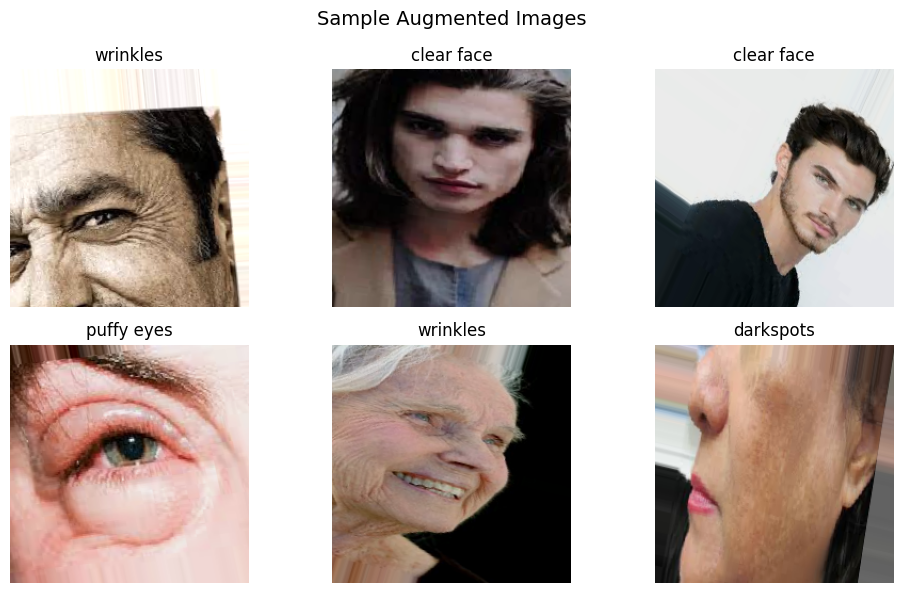

In [17]:
### MODULE-2: Image Preprocessing and Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Dataset path
dataset_path = r"C:\ARPEETA MOHANTY\dataset"

# 1. Training data generator with augmentation
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    validation_split=0.2  # 20% for validation
).flow_from_directory(
    dataset_path,
    target_size=(224,224),
    color_mode='rgb',  # Ensure RGB
    batch_size=16,
    class_mode='categorical',
    subset='training'
)

# 2. Validation data generator
val_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2).flow_from_directory(
    dataset_path,
    target_size=(224,224),
    color_mode='rgb',  # Ensure RGB
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

# 3. Print class indices
print("Class indices:", train_gen.class_indices)

# 4. Preview sample images
images, labels = next(train_gen)
plt.figure(figsize=(10,6))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i])
    plt.title(list(train_gen.class_indices.keys())[np.argmax(labels[i])])
    plt.axis('off')
plt.suptitle("Sample Augmented Images", fontsize=14)
plt.tight_layout()
plt.show()



In [18]:
from tensorflow.keras.utils import get_file
import os

# Delete cached EfficientNet weights
cache_dir = os.path.join(os.path.expanduser('~'), '.keras', 'models')
weights_file = os.path.join(cache_dir, 'efficientnetb0_notop.h5')
if os.path.exists(weights_file):
    os.remove(weights_file)
    print("Old cached weights removed.")


Old cached weights removed.


 Module 3: Model Training with EfficientNetB0

Found 324 images belonging to 4 classes.
Found 80 images belonging to 4 classes.
Loading EfficientNetB0 model...
Starting training...
Epoch 1/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3085 - loss: 1.5238
Epoch 1: accuracy improved from None to 0.35185, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - accuracy: 0.3519 - loss: 1.4707 - val_accuracy: 0.2500 - val_loss: 1.3869 - learning_rate: 1.0000e-04
Epoch 2/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3931 - loss: 1.2935
Epoch 2: accuracy improved from 0.35185 to 0.38272, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.3827 - loss: 1.3241 - val_accuracy: 0.2500 - val_loss: 1.3900 - learning_rate: 1.0000e-04
Epoch 3/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3525 - loss: 1.3108
Epoch 3: accuracy improved from 0.38272 to 0.39506, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.3951 - loss: 1.2902 - val_accuracy: 0.2500 - val_loss: 1.3936 - learning_rate: 1.0000e-04
Epoch 4/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3939 - loss: 1.3398
Epoch 4: accuracy improved from 0.39506 to 0.40741, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.4074 - loss: 1.2993 - val_accuracy: 0.2500 - val_loss: 1.3999 - learning_rate: 1.0000e-04
Epoch 5/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4189 - loss: 1.2566
Epoch 5: accuracy did not improve from 0.40741
11/11 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.3920 - loss: 1.2672 - val_accuracy: 0.2500 - val_loss: 1.4189 - learning_rate: 1.0000e-04
Epoch 6/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3807 - loss: 1.2916
Epoch 6: accuracy did not improve from 0.40741
11/11 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.4012 - loss: 1.2482 - val_accuracy: 0.2500 - val_loss: 1.4208 - learning_rate: 1.0000e-04
Epoch 7/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4408 - loss: 1.2614
Epoch 7: accuracy improved from 0.40741 to 0.47531, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.4753 - loss: 1.2370 - val_accuracy: 0.2500 - val_loss: 1.4301 - learning_rate: 1.0000e-04
Epoch 8/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4945 - loss: 1.2005
Epoch 8: accuracy did not improve from 0.47531
11/11 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.4691 - loss: 1.2198 - val_accuracy: 0.2500 - val_loss: 1.4562 - learning_rate: 1.0000e-04
Epoch 9/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4925 - loss: 1.2811
Epoch 9: accuracy improved from 0.47531 to 0.48148, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.4815 - loss: 1.2226 - val_accuracy: 0.2500 - val_loss: 1.4740 - learning_rate: 1.0000e-04
Epoch 10/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5429 - loss: 1.1701
Epoch 10: accuracy improved from 0.48148 to 0.51543, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.5154 - loss: 1.1759 - val_accuracy: 0.2500 - val_loss: 1.5340 - learning_rate: 1.0000e-04
Epoch 11/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5347 - loss: 1.1737
Epoch 11: accuracy improved from 0.51543 to 0.52469, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.5247 - loss: 1.1843 - val_accuracy: 0.2500 - val_loss: 1.5631 - learning_rate: 1.0000e-04
Epoch 12/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5581 - loss: 1.1120
Epoch 12: accuracy improved from 0.52469 to 0.53704, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.5370 - loss: 1.1806 - val_accuracy: 0.2500 - val_loss: 1.5743 - learning_rate: 1.0000e-04
Epoch 13/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4997 - loss: 1.1073
Epoch 13: accuracy did not improve from 0.53704
11/11 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.4753 - loss: 1.1167 - val_accuracy: 0.2500 - val_loss: 1.7374 - learning_rate: 1.0000e-04
Epoch 14/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4908 - loss: 1.1636
Epoch 14: accuracy did not improve from 0.53704
11/11 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.4907 - loss: 1.1544 - val_accuracy: 0.2500 - val_loss: 1.7367 - learning_rate: 1.0000e-04
Epoch 15/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5521 - loss: 1.0630
Epoch 15: accuracy did not improve from 0.53704
11/11 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.5278 - loss: 1.1051 - val_accuracy: 0.2500 - val_loss: 1.7643 - learning_rate: 1.0000e-04
Epoch 16/70
11/11 ━━━━━━━━━━━━━━

11/11 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.5401 - loss: 1.0597 - val_accuracy: 0.2500 - val_loss: 2.4949 - learning_rate: 1.0000e-04
Epoch 21/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5311 - loss: 1.1123
Epoch 21: accuracy did not improve from 0.54012
11/11 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.5185 - loss: 1.1109 - val_accuracy: 0.2500 - val_loss: 2.2058 - learning_rate: 1.0000e-04
Epoch 22/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5627 - loss: 1.0806
Epoch 22: accuracy improved from 0.54012 to 0.54938, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.5494 - loss: 1.1057 - val_accuracy: 0.2500 - val_loss: 2.0634 - learning_rate: 1.0000e-04
Epoch 23/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5720 - loss: 1.0040
Epoch 23: accuracy improved from 0.54938 to 0.55864, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.5586 - loss: 1.0272 - val_accuracy: 0.2500 - val_loss: 2.4440 - learning_rate: 1.0000e-04
Epoch 24/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5969 - loss: 1.0189
Epoch 24: accuracy improved from 0.55864 to 0.58951, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - accuracy: 0.5895 - loss: 1.0489 - val_accuracy: 0.2500 - val_loss: 2.9387 - learning_rate: 1.0000e-04
Epoch 25/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5498 - loss: 1.0450
Epoch 25: accuracy did not improve from 0.58951
11/11 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.5741 - loss: 1.0071 - val_accuracy: 0.2500 - val_loss: 2.4247 - learning_rate: 1.0000e-04
Epoch 26/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5663 - loss: 1.0221
Epoch 26: accuracy did not improve from 0.58951
11/11 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.5494 - loss: 1.0578 - val_accuracy: 0.2500 - val_loss: 2.7131 - learning_rate: 1.0000e-04
Epoch 27/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5795 - loss: 0.9734
Epoch 27: accuracy did not improve from 0.58951
11/11 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.5617 - loss: 1.0288 - val_accuracy: 0.2500 - val_loss: 2.7463 - learning_rate: 1.0000e-04
Epoch 28/70
11/11 ━━━━━━━━━━━━━━

11/11 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.5926 - loss: 0.9705 - val_accuracy: 0.2500 - val_loss: 3.4988 - learning_rate: 5.0000e-05
Epoch 35/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6013 - loss: 0.9781
Epoch 35: accuracy improved from 0.59259 to 0.60494, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.6049 - loss: 0.9894 - val_accuracy: 0.2500 - val_loss: 3.7570 - learning_rate: 5.0000e-05
Epoch 36/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6815 - loss: 0.8619
Epoch 36: accuracy improved from 0.60494 to 0.64815, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.6481 - loss: 0.9016 - val_accuracy: 0.2500 - val_loss: 3.2496 - learning_rate: 5.0000e-05
Epoch 37/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6228 - loss: 0.9404
Epoch 37: accuracy did not improve from 0.64815
11/11 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.5926 - loss: 0.9585 - val_accuracy: 0.2500 - val_loss: 3.2904 - learning_rate: 5.0000e-05
Epoch 38/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5791 - loss: 0.9684
Epoch 38: accuracy did not improve from 0.64815
11/11 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.5957 - loss: 0.9653 - val_accuracy: 0.2500 - val_loss: 3.0680 - learning_rate: 5.0000e-05
Epoch 39/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5815 - loss: 0.9614
Epoch 39: accuracy did not improve from 0.64815
11/11 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.6080 - loss: 0.9184 - val_accuracy: 0.2500 - val_loss: 3.2743 - learning_rate: 5.0000e-05
Epoch 40/70
11/11 ━━━━━━━━━━━━━━

11/11 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.6512 - loss: 0.9156 - val_accuracy: 0.2500 - val_loss: 3.0177 - learning_rate: 2.5000e-05
Epoch 44/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5900 - loss: 0.9253
Epoch 44: accuracy did not improve from 0.65123
11/11 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.6142 - loss: 0.9312 - val_accuracy: 0.2500 - val_loss: 3.2720 - learning_rate: 2.5000e-05
Epoch 45/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6115 - loss: 0.9702
Epoch 45: accuracy improved from 0.65123 to 0.65741, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.6574 - loss: 0.8940 - val_accuracy: 0.2500 - val_loss: 2.8302 - learning_rate: 2.5000e-05
Epoch 46/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5675 - loss: 0.9677
Epoch 46: accuracy did not improve from 0.65741
11/11 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.6204 - loss: 0.9334 - val_accuracy: 0.2500 - val_loss: 2.7673 - learning_rate: 2.5000e-05
Epoch 47/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5953 - loss: 0.9592
Epoch 47: accuracy did not improve from 0.65741
11/11 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.6049 - loss: 0.9355 - val_accuracy: 0.2500 - val_loss: 3.2664 - learning_rate: 2.5000e-05
Epoch 48/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6969 - loss: 0.8177
Epoch 48: accuracy improved from 0.65741 to 0.66667, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.6667 - loss: 0.8786 - val_accuracy: 0.2500 - val_loss: 3.3886 - learning_rate: 2.5000e-05
Epoch 49/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6785 - loss: 0.8020
Epoch 49: accuracy did not improve from 0.66667
11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.6451 - loss: 0.8712 - val_accuracy: 0.2500 - val_loss: 3.0863 - learning_rate: 2.5000e-05
Epoch 50/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6566 - loss: 0.8761
Epoch 50: accuracy improved from 0.66667 to 0.67284, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.6728 - loss: 0.8466 - val_accuracy: 0.2500 - val_loss: 3.1057 - learning_rate: 2.5000e-05
Epoch 51/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6304 - loss: 0.9272
Epoch 51: accuracy did not improve from 0.67284
11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.6420 - loss: 0.9181 - val_accuracy: 0.2500 - val_loss: 3.0859 - learning_rate: 2.5000e-05
Epoch 52/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6241 - loss: 0.9446
Epoch 52: accuracy did not improve from 0.67284
11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.6049 - loss: 0.9292 - val_accuracy: 0.2500 - val_loss: 3.4264 - learning_rate: 2.5000e-05
Epoch 53/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5902 - loss: 0.9990
Epoch 53: accuracy did not improve from 0.67284
11/11 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.6296 - loss: 0.9462 - val_accuracy: 0.2500 - val_loss: 3.4667 - learning_rate: 2.5000e-05
Epoch 54/70
11/11 ━━━━━━━━━━━━━━


Epoch 55: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-05.
11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.6944 - loss: 0.8603 - val_accuracy: 0.2500 - val_loss: 3.5969 - learning_rate: 2.5000e-05
Epoch 56/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6311 - loss: 0.9079
Epoch 56: accuracy did not improve from 0.69444
11/11 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.6420 - loss: 0.8778 - val_accuracy: 0.2500 - val_loss: 3.4580 - learning_rate: 1.2500e-05
Epoch 57/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6935 - loss: 0.7773
Epoch 57: accuracy did not improve from 0.69444
11/11 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.6852 - loss: 0.8116 - val_accuracy: 0.2500 - val_loss: 3.1178 - learning_rate: 1.2500e-05
Epoch 58/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6450 - loss: 0.8966
Epoch 58: accuracy did not improve from 0.69444
11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.6605 - loss: 0.8873 - val_accuracy: 0.2500 -

Model saved as 'final_model.h5'.
Final Training Accuracy: 65.12%
Final Validation Accuracy: 30.00%


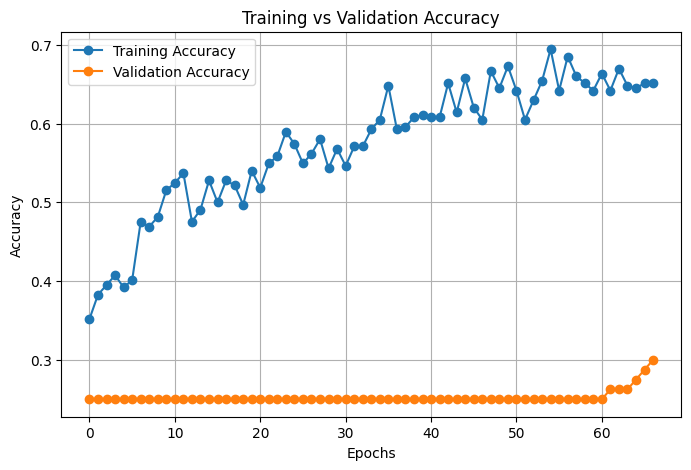

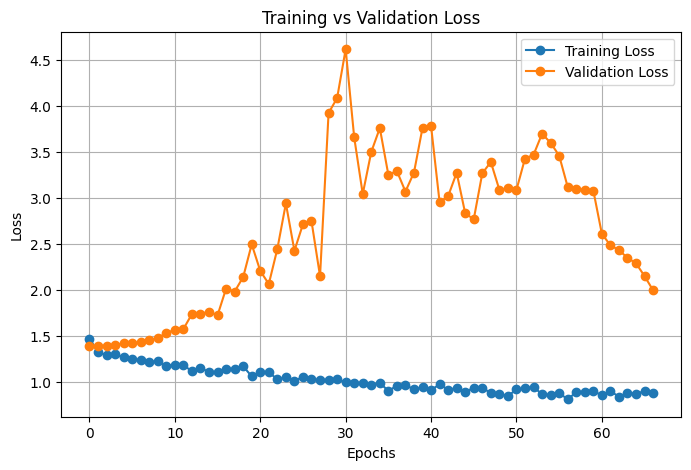

In [3]:
### Module 3: Model Training with EfficientNetB0
import matplotlib.pyplot as plt
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to your dataset
dataset_path = r"C:\ARPEETA MOHANTY\dataset"

# Data augmentation and splitting into training and validation sets
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Training data generator
train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    color_mode='rgb'
)

# Validation data generator
val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    color_mode='rgb'
)

# Load EfficientNetB0 model 
print("Loading EfficientNetB0 model...")
base_model = EfficientNetB0(
    include_top=False,
    weights=None,
    input_shape=(224, 224, 3)
)

# Make all layers trainable 
for layer in base_model.layers:
    layer.trainable = True

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(train_gen.num_classes, activation='softmax')(x)

# Build the complete model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer and categorical crossentropy
model.compile(
    optimizer=Adam(1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks to improve training
callbacks = [
    EarlyStopping(monitor='loss', patience=10, restore_best_weights=True, verbose=1),
    ModelCheckpoint('best_model.h5', monitor='accuracy', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
]

# Train the model
print("Starting training...")
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=70,  # updated epochs
    callbacks=callbacks,
    verbose=1
)

# Save the trained model
model.save('final_model.h5')
print("Model saved as 'final_model.h5'.")

# Print final accuracy in percentage
final_train_acc = history.history['accuracy'][-1] * 100
final_val_acc = history.history['val_accuracy'][-1] * 100
print(f"Final Training Accuracy: {final_train_acc:.2f}%")
print(f"Final Validation Accuracy: {final_val_acc:.2f}%")

# Plot training vs validation accuracy
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Plot training vs validation loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


Found 324 images belonging to 4 classes.
Found 80 images belonging to 4 classes.
Loading DenseNet121 model...
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step
Starting training...


c:\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3595 - loss: 1.5993

c:\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
c:\Python313\Lib\site-packages\PIL\Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(



Epoch 1: accuracy improved from None to 0.50309, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 97s 5s/step - accuracy: 0.5031 - loss: 1.2605 - val_accuracy: 0.4625 - val_loss: 1.4547 - learning_rate: 1.0000e-04
Epoch 2/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7734 - loss: 0.6594
Epoch 2: accuracy improved from 0.50309 to 0.82407, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 55s 5s/step - accuracy: 0.8241 - loss: 0.5317 - val_accuracy: 0.5875 - val_loss: 1.3114 - learning_rate: 1.0000e-04
Epoch 3/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8882 - loss: 0.3558
Epoch 3: accuracy improved from 0.82407 to 0.90432, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 54s 5s/step - accuracy: 0.9043 - loss: 0.3115 - val_accuracy: 0.6375 - val_loss: 1.3713 - learning_rate: 1.0000e-04
Epoch 4/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9360 - loss: 0.2241
Epoch 4: accuracy improved from 0.90432 to 0.93519, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 54s 5s/step - accuracy: 0.9352 - loss: 0.2090 - val_accuracy: 0.6750 - val_loss: 1.1686 - learning_rate: 1.0000e-04
Epoch 5/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9364 - loss: 0.2120
Epoch 5: accuracy improved from 0.93519 to 0.94444, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 54s 5s/step - accuracy: 0.9444 - loss: 0.1919 - val_accuracy: 0.7125 - val_loss: 1.0476 - learning_rate: 1.0000e-04
Epoch 6/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9405 - loss: 0.1818
Epoch 6: accuracy improved from 0.94444 to 0.94753, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 55s 5s/step - accuracy: 0.9475 - loss: 0.1741 - val_accuracy: 0.6750 - val_loss: 1.1445 - learning_rate: 1.0000e-04
Epoch 7/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9820 - loss: 0.0889
Epoch 7: accuracy improved from 0.94753 to 0.97222, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 55s 5s/step - accuracy: 0.9722 - loss: 0.1033 - val_accuracy: 0.6750 - val_loss: 1.2375 - learning_rate: 1.0000e-04
Epoch 8/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9665 - loss: 0.1215
Epoch 8: accuracy did not improve from 0.97222
11/11 ━━━━━━━━━━━━━━━━━━━━ 56s 5s/step - accuracy: 0.9660 - loss: 0.1141 - val_accuracy: 0.7250 - val_loss: 1.2274 - learning_rate: 1.0000e-04
Epoch 9/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9888 - loss: 0.0726
Epoch 9: accuracy improved from 0.97222 to 0.98457, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 56s 5s/step - accuracy: 0.9846 - loss: 0.0785 - val_accuracy: 0.7250 - val_loss: 0.9338 - learning_rate: 1.0000e-04
Epoch 10/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9763 - loss: 0.0900
Epoch 10: accuracy did not improve from 0.98457
11/11 ━━━━━━━━━━━━━━━━━━━━ 55s 5s/step - accuracy: 0.9753 - loss: 0.0879 - val_accuracy: 0.7375 - val_loss: 0.7896 - learning_rate: 1.0000e-04
Epoch 11/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9658 - loss: 0.1166
Epoch 11: accuracy did not improve from 0.98457
11/11 ━━━━━━━━━━━━━━━━━━━━ 55s 5s/step - accuracy: 0.9660 - loss: 0.1102 - val_accuracy: 0.8375 - val_loss: 0.6219 - learning_rate: 1.0000e-04
Epoch 12/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9768 - loss: 0.0760
Epoch 12: accuracy did not improve from 0.98457
11/11 ━━━━━━━━━━━━━━━━━━━━ 55s 5s/step - accuracy: 0.9753 - loss: 0.0840 - val_accuracy: 0.8000 - val_loss: 0.7123 - learning_rate: 1.0000e-04
Epoch 13/70
11/11 ━━━━━━━━━━━━━━

11/11 ━━━━━━━━━━━━━━━━━━━━ 55s 5s/step - accuracy: 0.9877 - loss: 0.0494 - val_accuracy: 0.7875 - val_loss: 0.7644 - learning_rate: 1.0000e-04
Epoch 16/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9605 - loss: 0.1363
Epoch 16: accuracy did not improve from 0.98765
11/11 ━━━━━━━━━━━━━━━━━━━━ 56s 6s/step - accuracy: 0.9877 - loss: 0.0520 - val_accuracy: 0.8125 - val_loss: 0.6023 - learning_rate: 1.0000e-04
Epoch 17/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9599 - loss: 0.1066
Epoch 17: accuracy did not improve from 0.98765
11/11 ━━━━━━━━━━━━━━━━━━━━ 56s 5s/step - accuracy: 0.9660 - loss: 0.0968 - val_accuracy: 0.8250 - val_loss: 0.5734 - learning_rate: 1.0000e-04
Epoch 18/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9964 - loss: 0.0430
Epoch 18: accuracy improved from 0.98765 to 0.99074, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 56s 5s/step - accuracy: 0.9907 - loss: 0.0526 - val_accuracy: 0.8500 - val_loss: 0.5702 - learning_rate: 1.0000e-04
Epoch 19/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9585 - loss: 0.0728
Epoch 19: accuracy did not improve from 0.99074
11/11 ━━━━━━━━━━━━━━━━━━━━ 56s 6s/step - accuracy: 0.9877 - loss: 0.0573 - val_accuracy: 0.9000 - val_loss: 0.5197 - learning_rate: 1.0000e-04
Epoch 20/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9799 - loss: 0.0718
Epoch 20: accuracy did not improve from 0.99074

Epoch 20: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
11/11 ━━━━━━━━━━━━━━━━━━━━ 56s 5s/step - accuracy: 0.9877 - loss: 0.0562 - val_accuracy: 0.8750 - val_loss: 0.4322 - learning_rate: 1.0000e-04
Epoch 21/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9968 - loss: 0.0363
Epoch 21: accuracy did not improve from 0.99074
11/11 ━━━━━━━━━━━━━━━━━━━━ 55s 5s/step - accuracy: 0.9907 - loss: 0.0405 - val_accuracy: 0.8500 -

11/11 ━━━━━━━━━━━━━━━━━━━━ 57s 5s/step - accuracy: 0.9938 - loss: 0.0425 - val_accuracy: 0.8250 - val_loss: 0.4561 - learning_rate: 5.0000e-05
Epoch 24/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 1.0000 - loss: 0.0251
Epoch 24: accuracy improved from 0.99383 to 1.00000, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 56s 5s/step - accuracy: 1.0000 - loss: 0.0229 - val_accuracy: 0.8375 - val_loss: 0.4980 - learning_rate: 5.0000e-05
Epoch 25/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9922 - loss: 0.0371
Epoch 25: accuracy did not improve from 1.00000
11/11 ━━━━━━━━━━━━━━━━━━━━ 56s 5s/step - accuracy: 0.9877 - loss: 0.0407 - val_accuracy: 0.8250 - val_loss: 0.4983 - learning_rate: 5.0000e-05
Epoch 26/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9941 - loss: 0.0303
Epoch 26: accuracy did not improve from 1.00000
11/11 ━━━━━━━━━━━━━━━━━━━━ 57s 5s/step - accuracy: 0.9969 - loss: 0.0236 - val_accuracy: 0.8625 - val_loss: 0.4761 - learning_rate: 5.0000e-05
Epoch 27/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9991 - loss: 0.0178
Epoch 27: accuracy did not improve from 1.00000
11/11 ━━━━━━━━━━━━━━━━━━━━ 58s 5s/step - accuracy: 0.9969 - loss: 0.0216 - val_accuracy: 0.8625 - val_loss: 0.4705 - learning_rate: 5.0000e-05
Epoch 28/70
11/11 ━━━━━━━━━━━━━━

Model saved as 'final_model1.h5'.
Final Training Accuracy: 99.69%
Final Validation Accuracy: 90.00%


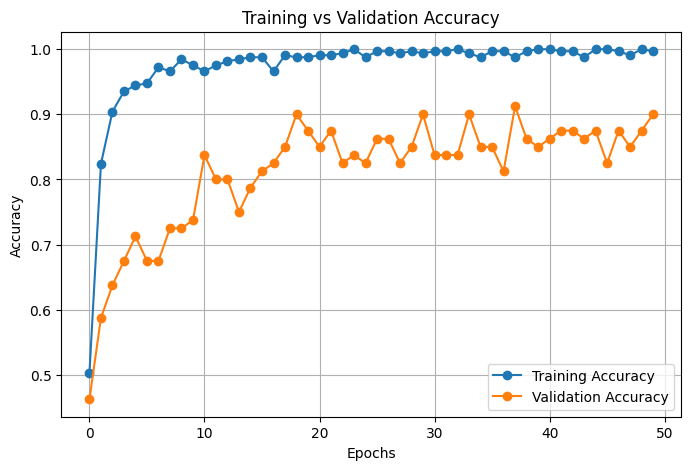

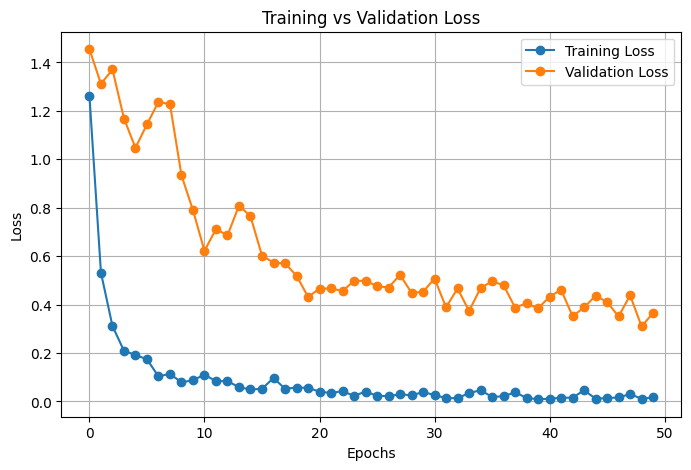

In [ ]:
### Module 3: Model Training with DenseNet121

import matplotlib.pyplot as plt
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to your dataset
dataset_path = r"C:\ARPEETA MOHANTY\dataset"

# Data augmentation and splitting into training and validation sets
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Training data generator
train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    color_mode='rgb'
)

# Validation data generator
val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    color_mode='rgb'
)

# Load DenseNet121 model with ImageNet weights
print("Loading DenseNet121 model...")
base_model = DenseNet121(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)

# Make all layers trainable
for layer in base_model.layers:
    layer.trainable = True

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(train_gen.num_classes, activation='softmax')(x)

# Build the complete model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(
    optimizer=Adam(1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
callbacks = [
    EarlyStopping(monitor='loss', patience=10, restore_best_weights=True, verbose=1),
    ModelCheckpoint('best_model.h5', monitor='accuracy', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
]

# Train the model
print("Starting training...")
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=70,
    callbacks=callbacks,
    verbose=1
)

# Save the trained model
model.save('final_model1.h5')
print("Model saved as 'final_model1.h5'.")

# Print final accuracy in percentage
final_train_acc = history.history['accuracy'][-1] * 100
final_val_acc = history.history['val_accuracy'][-1] * 100
print(f"Final Training Accuracy: {final_train_acc:.2f}%")
print(f"Final Validation Accuracy: {final_val_acc:.2f}%")

# Plot training vs validation accuracy
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Plot training vs validation loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


Module 3: Model Training with DenseNet121

Found 324 images belonging to 4 classes.
Found 80 images belonging to 4 classes.
Loading DenseNet121 model...
Starting full model training ...
Epoch 1/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.3009 - loss: 2.0748
Epoch 1: val_accuracy improved from None to 0.38750, saving model to best_densenet_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 107s 6s/step - accuracy: 0.3333 - loss: 1.9441 - val_accuracy: 0.3875 - val_loss: 1.4053 - learning_rate: 1.0000e-04
Epoch 2/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5031 - loss: 1.3118
Epoch 2: val_accuracy improved from 0.38750 to 0.42500, saving model to best_densenet_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 60s 5s/step - accuracy: 0.5586 - loss: 1.1686 - val_accuracy: 0.4250 - val_loss: 1.3147 - learning_rate: 1.0000e-04
Epoch 3/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6277 - loss: 0.9724
Epoch 3: val_accuracy improved from 0.42500 to 0.47500, saving model to best_densenet_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 61s 6s/step - accuracy: 0.6265 - loss: 0.9512 - val_accuracy: 0.4750 - val_loss: 1.2106 - learning_rate: 1.0000e-04
Epoch 4/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7039 - loss: 0.8246
Epoch 4: val_accuracy did not improve from 0.47500
11/11 ━━━━━━━━━━━━━━━━━━━━ 60s 5s/step - accuracy: 0.6975 - loss: 0.8950 - val_accuracy: 0.4375 - val_loss: 1.1731 - learning_rate: 1.0000e-04
Epoch 5/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7037 - loss: 0.8240
Epoch 5: val_accuracy improved from 0.47500 to 0.51250, saving model to best_densenet_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 62s 6s/step - accuracy: 0.6944 - loss: 0.8278 - val_accuracy: 0.5125 - val_loss: 1.1794 - learning_rate: 1.0000e-04
Epoch 6/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7359 - loss: 0.7283
Epoch 6: val_accuracy did not improve from 0.51250
11/11 ━━━━━━━━━━━━━━━━━━━━ 62s 6s/step - accuracy: 0.7623 - loss: 0.6489 - val_accuracy: 0.5125 - val_loss: 1.1076 - learning_rate: 1.0000e-04
Epoch 7/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7640 - loss: 0.6614
Epoch 7: val_accuracy improved from 0.51250 to 0.62500, saving model to best_densenet_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 63s 6s/step - accuracy: 0.8056 - loss: 0.5829 - val_accuracy: 0.6250 - val_loss: 1.0698 - learning_rate: 1.0000e-04
Epoch 8/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8172 - loss: 0.5201
Epoch 8: val_accuracy improved from 0.62500 to 0.63750, saving model to best_densenet_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 63s 6s/step - accuracy: 0.8117 - loss: 0.5417 - val_accuracy: 0.6375 - val_loss: 0.9519 - learning_rate: 1.0000e-04
Epoch 9/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8402 - loss: 0.4307
Epoch 9: val_accuracy did not improve from 0.63750
11/11 ━━━━━━━━━━━━━━━━━━━━ 63s 6s/step - accuracy: 0.7994 - loss: 0.5616 - val_accuracy: 0.6375 - val_loss: 0.9526 - learning_rate: 1.0000e-04
Epoch 10/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8382 - loss: 0.4713
Epoch 10: val_accuracy improved from 0.63750 to 0.67500, saving model to best_densenet_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 65s 6s/step - accuracy: 0.8426 - loss: 0.4736 - val_accuracy: 0.6750 - val_loss: 0.8665 - learning_rate: 1.0000e-04
Epoch 11/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8015 - loss: 0.4355
Epoch 11: val_accuracy improved from 0.67500 to 0.72500, saving model to best_densenet_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 64s 6s/step - accuracy: 0.8241 - loss: 0.4403 - val_accuracy: 0.7250 - val_loss: 0.6578 - learning_rate: 1.0000e-04
Epoch 12/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8449 - loss: 0.4718
Epoch 12: val_accuracy did not improve from 0.72500
11/11 ━━━━━━━━━━━━━━━━━━━━ 63s 6s/step - accuracy: 0.8611 - loss: 0.4071 - val_accuracy: 0.6750 - val_loss: 0.7221 - learning_rate: 1.0000e-04
Epoch 13/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8485 - loss: 0.4177
Epoch 13: val_accuracy improved from 0.72500 to 0.78750, saving model to best_densenet_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 66s 6s/step - accuracy: 0.8673 - loss: 0.4083 - val_accuracy: 0.7875 - val_loss: 0.6320 - learning_rate: 1.0000e-04
Epoch 14/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8388 - loss: 0.4145
Epoch 14: val_accuracy did not improve from 0.78750
11/11 ━━━━━━━━━━━━━━━━━━━━ 65s 6s/step - accuracy: 0.8519 - loss: 0.4157 - val_accuracy: 0.7625 - val_loss: 0.6565 - learning_rate: 1.0000e-04
Epoch 15/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9106 - loss: 0.2710
Epoch 15: val_accuracy did not improve from 0.78750
11/11 ━━━━━━━━━━━━━━━━━━━━ 64s 6s/step - accuracy: 0.9167 - loss: 0.2662 - val_accuracy: 0.7250 - val_loss: 0.6504 - learning_rate: 1.0000e-04
Epoch 16/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8645 - loss: 0.3587
Epoch 16: val_accuracy did not improve from 0.78750
11/11 ━━━━━━━━━━━━━━━━━━━━ 64s 6s/step - accuracy: 0.8981 - loss: 0.2638 - val_accuracy: 0.7875 - val_loss: 0.5457 - learning_rate: 1.0000e-04
Epoch 17/70
11/11 ━━

11/11 ━━━━━━━━━━━━━━━━━━━━ 67s 7s/step - accuracy: 0.8796 - loss: 0.3507 - val_accuracy: 0.8000 - val_loss: 0.6030 - learning_rate: 1.0000e-04
Epoch 18/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.8729 - loss: 0.3289
Epoch 18: val_accuracy did not improve from 0.80000
11/11 ━━━━━━━━━━━━━━━━━━━━ 72s 7s/step - accuracy: 0.8735 - loss: 0.3324 - val_accuracy: 0.7875 - val_loss: 0.5473 - learning_rate: 1.0000e-04
Epoch 19/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9034 - loss: 0.2422
Epoch 19: val_accuracy improved from 0.80000 to 0.81250, saving model to best_densenet_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 74s 7s/step - accuracy: 0.8981 - loss: 0.2711 - val_accuracy: 0.8125 - val_loss: 0.6197 - learning_rate: 1.0000e-04
Epoch 20/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9160 - loss: 0.2447
Epoch 20: val_accuracy did not improve from 0.81250

Epoch 20: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
11/11 ━━━━━━━━━━━━━━━━━━━━ 73s 7s/step - accuracy: 0.9167 - loss: 0.2641 - val_accuracy: 0.7750 - val_loss: 0.6270 - learning_rate: 1.0000e-04
Epoch 21/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9025 - loss: 0.2588
Epoch 21: val_accuracy did not improve from 0.81250
11/11 ━━━━━━━━━━━━━━━━━━━━ 70s 6s/step - accuracy: 0.9074 - loss: 0.2463 - val_accuracy: 0.7875 - val_loss: 0.5224 - learning_rate: 3.0000e-05
Epoch 22/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8926 - loss: 0.3322
Epoch 22: val_accuracy did not improve from 0.81250
11/11 ━━━━━━━━━━━━━━━━━━━━ 64s 6s/step - accuracy: 0.9043 - loss: 0.2631 - val_accur

11/11 ━━━━━━━━━━━━━━━━━━━━ 66s 6s/step - accuracy: 0.9167 - loss: 0.2213 - val_accuracy: 0.8500 - val_loss: 0.5189 - learning_rate: 3.0000e-05
Epoch 24/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9367 - loss: 0.2252
Epoch 24: val_accuracy did not improve from 0.85000
11/11 ━━━━━━━━━━━━━━━━━━━━ 65s 6s/step - accuracy: 0.9383 - loss: 0.2084 - val_accuracy: 0.8375 - val_loss: 0.5127 - learning_rate: 3.0000e-05
Epoch 25/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9216 - loss: 0.2529
Epoch 25: val_accuracy improved from 0.85000 to 0.90000, saving model to best_densenet_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 70s 6s/step - accuracy: 0.9352 - loss: 0.2150 - val_accuracy: 0.9000 - val_loss: 0.4566 - learning_rate: 3.0000e-05
Epoch 26/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9202 - loss: 0.1915
Epoch 26: val_accuracy did not improve from 0.90000
11/11 ━━━━━━━━━━━━━━━━━━━━ 73s 7s/step - accuracy: 0.9290 - loss: 0.1828 - val_accuracy: 0.8750 - val_loss: 0.4369 - learning_rate: 3.0000e-05
Epoch 27/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9207 - loss: 0.2167
Epoch 27: val_accuracy did not improve from 0.90000
11/11 ━━━━━━━━━━━━━━━━━━━━ 72s 6s/step - accuracy: 0.9074 - loss: 0.2450 - val_accuracy: 0.8500 - val_loss: 0.4485 - learning_rate: 3.0000e-05
Epoch 28/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9254 - loss: 0.1907
Epoch 28: val_accuracy did not improve from 0.90000
11/11 ━━━━━━━━━━━━━━━━━━━━ 65s 6s/step - accuracy: 0.9352 - loss: 0.2112 - val_accuracy: 0.8500 - val_loss: 0.4539 - learning_rate: 3.0000e-05
Epoch 29/70
11/11 ━━

Model saved as 'final_densenet_model.h5'.
Final Training Accuracy: 92.90%
Final Validation Accuracy: 86.25%


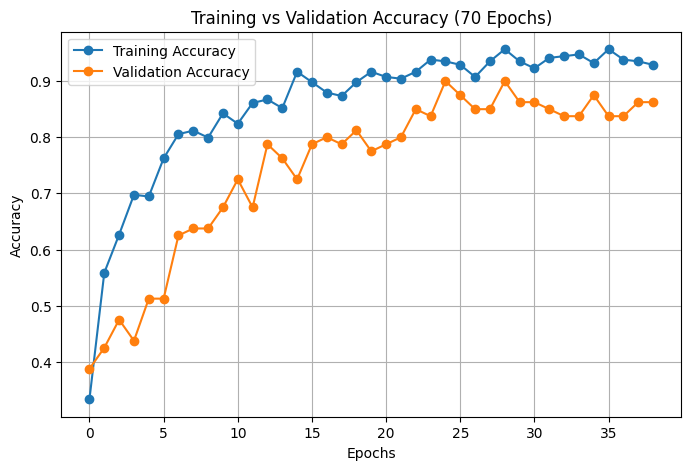

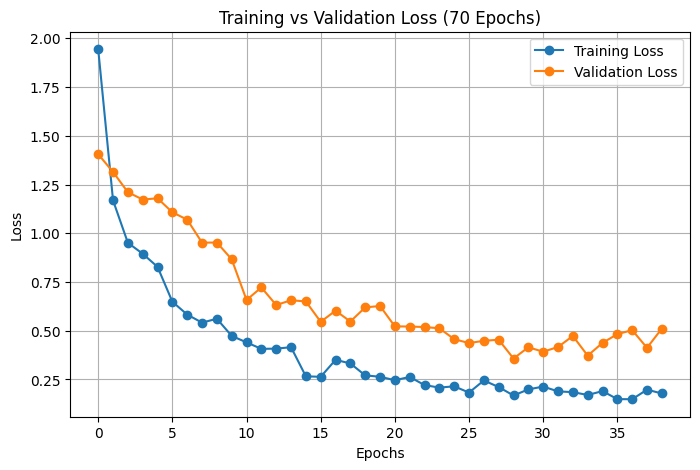

In [ ]:
### Module 3: Model Training with DenseNet121
import matplotlib.pyplot as plt
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ---------------- Path to Dataset ----------------
dataset_path = r"C:\ARPEETA MOHANTY\dataset"

# ---------------- Data Augmentation ----------------
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.9, 1.1],
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# ---------------- Load Full DenseNet121 ----------------
print("Loading DenseNet121 model...")
base_model = DenseNet121(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)

# Make ALL layers trainable
for layer in base_model.layers:
    layer.trainable = True

# ---------------- Custom Head ----------------
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
output = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# ---------------- Compile ----------------
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ---------------- Callbacks ----------------
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1),
    ModelCheckpoint('best_densenet_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=4, min_lr=1e-6, verbose=1)
]

# ---------------- Train Model ----------------
print("Starting full model training ...")
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=70,
    callbacks=callbacks,
    verbose=1
)

# ---------------- Save Final Model ----------------
model.save('final_densenet_model.h5')
print("Model saved as 'final_densenet_model.h5'.")

# ---------------- Accuracy Report ----------------
final_train_acc = history.history['accuracy'][-1] * 100
final_val_acc = history.history['val_accuracy'][-1] * 100
print(f"Final Training Accuracy: {final_train_acc:.2f}%")
print(f"Final Validation Accuracy: {final_val_acc:.2f}%")

# ---------------- Accuracy Plot ----------------
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title("Training vs Validation Accuracy (70 Epochs)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ---------------- Loss Plot ----------------
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title("Training vs Validation Loss (70 Epochs)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()




Module 4: Face Detection + Skin Type + Age 

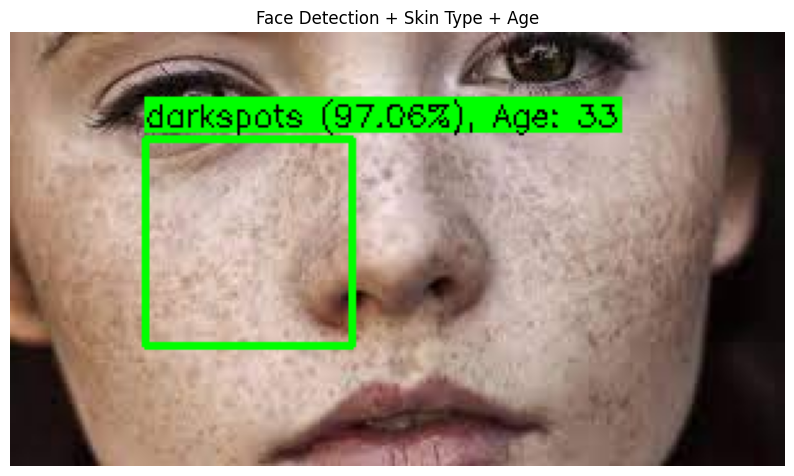

In [4]:
### Module 4: Face Detection + Skin Type + Age (Improved Label Placement)

import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from matplotlib import pyplot as plt
from random import randint

# ----------------- Load DenseNet Skin Model -----------------
skin_model_path = r"C:\ARPEETA MOHANTY\final_densenet_model.h5"
skin_model = load_model(skin_model_path)
skin_classes = ['clear face', 'darkspots', 'puffy eyes', 'wrinkles']

# ----------------- Haar Cascade for Face Detection -----------------
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# ----------------- Load Test Image -----------------
image_path = r"C:\ARPEETA MOHANTY\dataset\darkspots\6.jpg"
image = cv2.imread(image_path)
if image is None:
    print("Error: Image not found")
    exit()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
(h, w) = image.shape[:2]
padding = 20

# ----------------- Detect Faces -----------------
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=3, minSize=(30,30))

# ----------------- Process Each Face -----------------
for i, (x, y, fw, fh) in enumerate(faces):
    # Add padding safely
    x1 = max(0, x - padding)
    y1 = max(0, y - padding)
    x2 = min(w-1, x + fw + padding)
    y2 = min(h-1, y + fh + padding)

    face_skin = image[y1:y2, x1:x2]
    if face_skin.shape[0] < 20 or face_skin.shape[1] < 20:
        continue

    face_skin_rgb = cv2.cvtColor(face_skin, cv2.COLOR_BGR2RGB)

    # ---- Skin Type Prediction ----
    face_resized = cv2.resize(face_skin_rgb, (224,224))
    face_array = np.expand_dims(img_to_array(face_resized)/255.0, axis=0)
    pred = skin_model.predict(face_array, verbose=0)[0]
    skin_index = np.argmax(pred)
    skin_type = skin_classes[skin_index]
    confidence_skin = pred[skin_index]*100

    # ---- Assign Age Based on Skin Type ----
    if skin_type == "clear face":
        est_age_range = randint(18, 30)
    elif skin_type == "darkspots":
        est_age_range = randint(30, 40)
    elif skin_type == "puffy eyes":
        est_age_range = randint(40, 55)
    else:  # wrinkles
        est_age_range = randint(56, 70)

    # ---- Draw Bounding Box ----
    cv2.rectangle(image, (x1, y1), (x2, y2), (0,255,0), 2)

    # ---- Draw Label Above Bounding Box (Better Visibility) ----
    label = f"{skin_type} ({confidence_skin:.2f}%), Age: {est_age_range}"
    font_scale = 0.4
    thickness = 1
    text_size = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)[0]
    text_width, text_height = text_size

    # Position the text above the bounding box
    text_x = x1
    text_y = max(y1 - 5, text_height + 5)

    # Draw filled rectangle behind text
    cv2.rectangle(image, (text_x, text_y - text_height - 2), (text_x + text_width, text_y + 2), (0,255,0), cv2.FILLED)
    cv2.putText(image, label, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0,0,0), thickness)

# ----------------- Show Final Image -----------------
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,8))
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Face Detection + Skin Type + Age")
plt.show()
